# Feature Selection

🎯 This exercise is a continuation of the previous one, in which you will perform feature selection. 

👇 Run the cell below to load your preprocessed dataset.

In [1]:
import pandas as pd

data = pd.read_csv("data/clean_dataset.csv")

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,RFn,Unf,Fin,NoGarage,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,0.0,0.0,1.0,8.660254e-01,5.000000e-01
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,0.0,0.0,1.0,5.000000e-01,-8.660254e-01
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,0.0,0.0,1.0,-1.000000e+00,-1.836970e-16
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,1.0,0.0,0.0,0.0,8.660254e-01,5.000000e-01
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,0.0,0.0,1.0,-2.449294e-16,1.000000e+00


# Collinearity investigation

👇 Plot a heatmap of the Pearson Correlation between the dataset columns.

<AxesSubplot:>

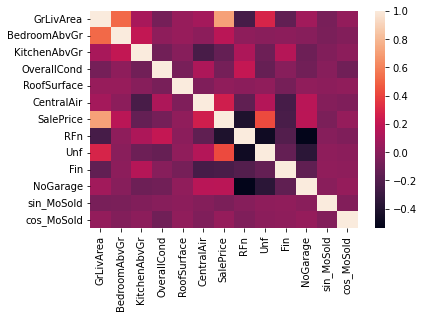

In [4]:
# YOUR CODE HERE
import seaborn as sns
corr = data.corr()
sns.heatmap(corr)

👇 Visualize the correlation between column pairs in a dataframe.

In [0]:
# YOUR CODE HERE

❓ How many pairs of features exceed a correlation of 0.9 or -0.9? Save your answer as an integer under variable name `correlated_features`

In [12]:
# YOUR CODE HERE
correlated_features = len(corr.where(abs(corr)>0.9))-len(corr.columns)
correlated_features

0

### ☑️ Test your code

In [13]:
from nbresult import ChallengeResult

result = ChallengeResult('correlation',
                         correlated_features = correlated_features
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/humbert/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/humbert/code/HumbertMonnot/data-challenges/05-ML/02-Prepare-the-dataset/02-Feature-Selection
plugins: anyio-3.4.0, dash-2.0.0
collecting ... collected 1 item

tests/test_correlation.py::TestCorrelation::test_correlated_features PASSED [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/correlation.pickle

git commit -m 'Completed correlation step'

git push origin master


# Base Modelling

👇 Prepare the feature set `X` and target `y`. Remember that we want to model the `SalePrice` with the preprocessed features.

In [22]:
# YOUR CODE HERE
target = 'SalePrice'
features = list(data.columns)
features.remove(target)
X= data[features]
y= data[target]

👇 Cross validate a linear regression model. Save the score under variable name `base_model_score`.

In [25]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

model = LinearRegression()
score = cross_validate(model, X, y)['test_score']
base_model_score = score.mean()
base_model_score

0.6419150447545152

### ☑️ Test your code

In [26]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/humbert/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/humbert/code/HumbertMonnot/data-challenges/05-ML/02-Prepare-the-dataset/02-Feature-Selection
plugins: anyio-3.4.0, dash-2.0.0
collecting ... collected 1 item

tests/test_base_model.py::TestBase_model::test_base_model_score PASSED   [100%]

============================== 1 passed in 0.09s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master


# Feature Permutation

👇 Perform feature permutation, and rank features by order of importance.

In [47]:
# YOUR CODE HERE
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
import numpy as np

log_model = LinearRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(log_model, X, y, n_repeats=10) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results
importance_df.columns=['feature','score decrease']

importance_df.sort_values(by="score decrease", ascending = False) # Order by importance

,feature,score decrease
0,GrLivArea,1.000658
1,BedroomAbvGr,0.073909
6,Unf,0.063984
5,RFn,0.023758
4,CentralAir,0.02277
7,Fin,0.014398
8,NoGarage,0.013649
9,sin_MoSold,0.000717
2,OverallCond,0.000522
10,cos_MoSold,0.000116


❓ Which feature is the most important? Save your answer as a `string` under variable name `best_feature`.

In [30]:
# YOUR CODE HERE
best_feature = 'GrLivArea'

### ☑️ Test your code

In [31]:
from nbresult import ChallengeResult

result = ChallengeResult('feature_permutation',
                         feature = best_feature
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/humbert/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/humbert/code/HumbertMonnot/data-challenges/05-ML/02-Prepare-the-dataset/02-Feature-Selection
plugins: anyio-3.4.0, dash-2.0.0
collecting ... collected 1 item

tests/test_feature_permutation.py::TestFeature_permutation::test_best_feature PASSED [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/feature_permutation.pickle

git commit -m 'Completed feature_permutation step'

git push origin master


# Reduced complexity model

👇 Drop the the weak features and cross-validate a new model. You should aim to maintain a score close to the previous one. Save the score under variable name `simplified_model_score`.

In [49]:
# YOUR CODE HERE
target = 'SalePrice'
features = list(data.columns)
features.remove(target)
features.remove('RoofSurface')
features.remove('cos_MoSold')
features.remove('sin_MoSold')
X= data[features]
y= data[target]

model = LinearRegression()
score = cross_validate(model, X, y)['test_score']
simplified_model_score = score.mean()
simplified_model_score

0.6422981043940175

### ☑️ Test your code

In [43]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_complexity_model',
                         model_score = simplified_model_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/humbert/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/humbert/code/HumbertMonnot/data-challenges/05-ML/02-Prepare-the-dataset/02-Feature-Selection
plugins: anyio-3.4.0, dash-2.0.0
collecting ... collected 1 item

tests/test_reduced_complexity_model.py::TestReduced_complexity_model::test_reduced_complexity_score PASSED [100%]

============================== 1 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/reduced_complexity_model.pickle

git commit -m 'Completed reduced_complexity_model step'

git push origin master


# 🏁